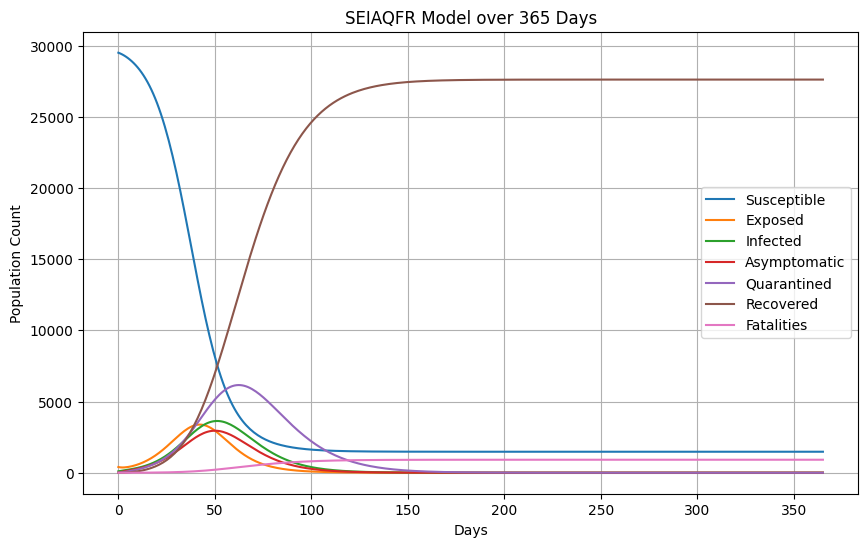

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the SEIAQFR system of ODEs
def SEIAQFR(classes, t, *params):
    S, E, I, A, Q, R, F = classes # as a function of time
    N, beta, alpha, p, gamma, phi, q, theta, delta, x = params

    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - alpha * E
    dIdt = alpha * p * E + phi * (1-q) * A - gamma * I
    dAdt = alpha * (1-p) * E - phi * A
    dQdt = gamma * I - theta * (1-x) * Q - delta * x * Q
    dRdt = phi * q * A + theta * (1-x) * Q
    dFdt = delta * x * Q
    
    return [dSdt, dEdt, dIdt, dAdt, dQdt, dRdt, dFdt]


# Parameters
# placeholder parameters
N = 30000  # total population
beta = 0.5  # average contact frequency
alpha = 1/5  # inverse of incubation period
p = 0.5  # fraction that becomes symptomatic
gamma = 1/7  # rate of quarantine
phi = 1/10  # rate of symptom development in asymptomatics
q = 0.2  # fraction of asymptomatics that automatically recover
theta = 1/14  # recovery rate after treatment
delta = 1/20  # fatality rate
x = 0.05  # probability of death

params = [N, beta, alpha, p, gamma, phi, q, theta, delta, x] # this is a tuple (cant modify these values)

# Initial conditions
I0 = 100  # initial infected
E0 = 4 * I0  # 4 times as many exposed as symptomatic initially (for illustration)
S0 = N - I0 - E0  # initial susceptible
A0 = 0
Q0 = 0
R0 = 0  # initial recovered
F0 = 0  # initial fatalities

initial_conditions = [S0, E0, I0, A0, Q0, R0, F0]

# Time vector
timespan_days = 365
t = np.linspace(0, timespan_days, timespan_days)

# Solve the ODE
sol = odeint(SEIAQFR, initial_conditions, t, args=tuple(params))

# Plotting classes of population together
plt.figure(figsize=(10,6))
plt.plot(t, sol[:, 0], label='Susceptible')
plt.plot(t, sol[:, 1], label='Exposed')
plt.plot(t, sol[:, 2], label='Infected')
plt.plot(t, sol[:, 3], label='Asymptomatic')
plt.plot(t, sol[:, 4], label='Quarantined')
plt.plot(t, sol[:, 5], label='Recovered')
plt.plot(t, sol[:, 6], label='Fatalities')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Population Count')
plt.title('SEIAQFR Model over ' + str(timespan_days) + ' Days')
plt.grid(True)
plt.show()

# Plotting classes of population individually
